# 6. Activation Functions

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 6.1 Generate Data

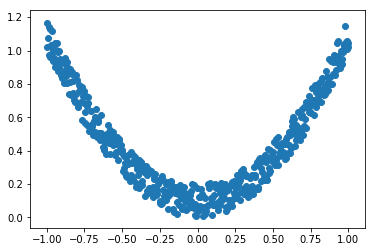

In [3]:
x = torch.linspace(-1, 1, 500)
y = x.pow(2) + 0.2*torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [4]:
x.shape, y.shape

(torch.Size([500]), torch.Size([500]))

In [5]:
x = torch.unsqueeze(x, dim=1) # or x = torch.reshape(-1,1)
y = torch.unsqueeze(y, dim=1)

In [6]:
x.shape, y.shape

(torch.Size([500, 1]), torch.Size([500, 1]))

## 6.2 Define & Train Linear Model

In [7]:
hidden = nn.Linear(1, 20, bias=True)
output = nn.Linear(20, 1, bias=True)

In [8]:
model = nn.Sequential(hidden, output)

In [9]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

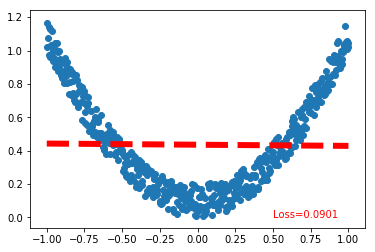

In [10]:
for step in range(500):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw=6)
plt.text(0.5, 0, 'Loss=%.4f' % cost.item(), fontdict={'size':10, 'color':'red'})
plt.show()

## 6.3 Define & Train NonLinear Model

In [11]:
hidden = nn.Linear(1, 20, bias=True)
activation = nn.ReLU()
output = nn.Linear(20, 1, bias=True)

In [12]:
model = nn.Sequential(hidden, activation, output)

In [13]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

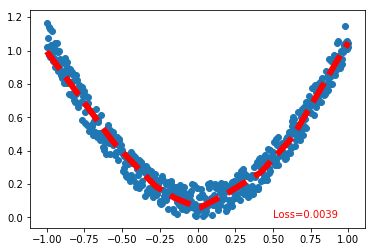

In [14]:
for step in range(500):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw=6)
plt.text(0.5, 0, 'Loss=%.4f' % cost.item(), fontdict={'size':10, 'color':'red'})
plt.show()

# 추가

xor에 대해서 activation function 유무에 따른 차이 확인   
참고 링크: 
* https://github.com/deeplearningzerotoall/PyTorch/blob/master/lab-08_1_xor.ipynb,   
* https://github.com/deeplearningzerotoall/PyTorch/blob/master/lab-08_2_xor_nn.ipynb

In [15]:
xor_x = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_y = torch.FloatTensor([[0], [1], [1], [0]])

In [16]:
# layers
hidden = nn.Linear(2, 20, bias=True)
output = nn.Linear(20, 1, bias=True)
activation = nn.ReLU()

In [17]:
xor_model_1 = nn.Sequential(hidden, output)
xor_model_2 = nn.Sequential(hidden, activation, output)

In [18]:
criterion = nn.BCELoss()
optimizer_1 = optim.SGD(xor_model_1.parameters(), lr=0.1)
optimizer_2 = optim.SGD(xor_model_2.parameters(), lr=0.1)

In [21]:
for step in range(500):
    pre = xor_model_1(xor_x)
    cost = loss(pre, xor_y)
    
    optimizer_1.zero_grad()
    cost.backward()
    optimizer_1.step()
    
    if step % 100 == 0:
        print(step, cost.item())

0 0.25
100 0.25
200 0.25
300 0.25
400 0.2499999701976776


In [22]:
for step in range(500):
    pre = xor_model_2(xor_x)
    cost = loss(pre, xor_y)
    
    optimizer_2.zero_grad()
    cost.backward()
    optimizer_2.step()
    
    if step % 100 == 0:
        print(step, cost.item())

0 0.29994291067123413
100 0.01920723170042038
200 5.0454440497560427e-05
300 8.65149800688414e-08
400 1.4509532464401786e-10


Accuracy computation: True if hypothesis > 0.5

In [23]:
with torch.no_grad():
    hypothesis = xor_model_1(xor_x)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == xor_y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item())


Hypothesis:  [[0.36308762]
 [0.6001086 ]
 [0.34377235]
 [0.5807932 ]] 
Correct:  [[0.]
 [1.]
 [0.]
 [1.]] 
Accuracy:  0.5


In [24]:
with torch.no_grad():
    hypothesis = xor_model_2(xor_x)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == xor_y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item())


Hypothesis:  [[1.0803342e-06]
 [9.9999940e-01]
 [9.9999905e-01]
 [4.9918890e-07]] 
Correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  1.0
